# Intake DCAT Demo

This is a demo for using the `intake` catalog source with four different file types: CSV, GeoJSON, Shapefile, and Parquet. We have been working on using `intake` to adapt a DCAT catalog to an intake catalog, along with specifying how to load datasets. This demo serves as a reference point to understand how we can load local and remote datasets using the `intake` catalog. We hope this serves as a resource to facilitate reproducability of code and accessibility of various files, as well as a guide for how the `intake` catalog source works.

In [2]:
%matplotlib inline
import intake

## **YAML**
YAML files are configuration files and the most common method for creating different catalogs. They are similar to JSON files, but have different strengths when it comes to data serialization of complex structures.

Throughout the rest of this demo, the YAML files themselves are the main source of code changes as we work on processing different file types. We use YAML files to establish a catalog that we can then call upon to access datasets and perform our analysis. The catalog serves as a method for simplifying the analytics process by avoiding the need for boilerplate code and increasing the reproducability of our methods.


## **GeoJSONs**
### *Remote GeoJSONs*
For the first step in our demo, we will start with the GeoJSON format. Remote GeoJSON files can be found in the DCAT catalogs for the City of Los Angeles open data portals. These datasets are specified in [catalog.yml](./catalog.yml). We can optionally give an `item` argument, which will filter the catalog to only include the selected items.

We use `intake` here to load the catalog into memory for the remote GeoJSON:

In [3]:
catalog0 = intake.open_catalog('catalog.yml')
print(list(catalog0))

['la_open_data', 'la_geohub']


The output here includes the two sources of data we specified in our YAML file `la_open_data` and `la_geohub`. These are the twoopen data portals for the City of LA so depending on which datasets you are looking to analyze you can choose either data source. When referencing the catalog later on, you can reference it with regards to the specific source of data that your dataset is in.

### *Local GeoJSONs*
[local_geojson.yml](./local_geojson.yml) is a YAML file that loads in our local GeoJSON files. The main change in this YAML file from the previous file ([catalog.yml](./catalog.yml)) is the change in `driver`. The `driver` in any YAML file serves as the direction for how to load our dataset. For the remote GeoJSONs, we used `driver: dcat`. Since we are loading in local GeoJSONs, we will use `driver: geojson`. In addition to the change in `driver` we also change `url` to `urlpath` and remove the `items`. This is because `url` and `items` are both specifications used by the DCAT format in particular and, since we're using the geojson driver, we don't need those.

In [4]:
catalog1 = intake.open_catalog('local_geojson.yml') #reading in new YAML file with updated data
print(list(catalog1))

['cultural_data', 'phys_act_data']


Again, the output here is the two sources of data we included in our YAML file.

## **CSVs**

### *Remote CSVs*
Used for storing tabular data, CSVs are another common file type that intake can process. To do so, CSVs also require a change in `driver` as with other file types. The driver here becomes `driver: csv`. For remote CSVs we can optionally go through the City's open database website, find our specific datasource, and copy the downloadURL to our YAML file. This involves a more work and since DCAT already works towards compiling information like the DownloadURLs without us doing so ourselves, we can save time by using [catalog.yml](./catalog.yml) like we did for remote

In [14]:
catalog2 = intake.open_catalog('remote_csv.yml')
print(list(catalog2))

['housing_data', 'affordable_data']


### *Local CSVs*
Using the same `driver` as remote CSVs, local CSVs can be loaded in with just a change of the `urlpath`. The `urlpath` should be the path to the directory where the CSV is stored. If the CSVs are the same folder as the YAML file ([local_csv.yml](./local_csv.yml)) you can use a shortcut to access the file via: `urlpath: '{{ CATALOG_DIR }}/your_csv.csv`.

In [15]:
catalog3 = intake.open_catalog('local_csv.yml')
print(list(catalog3))

['la_county', 'county_fuel', 'alternative_fuel', 'la_city']


## **Shapefiles**

### *Remote Shapefiles*
Shapefiles are a useful geospatial vector data file format. To create a catalog with shapefiles, we can again write a different YAML file. Shapefiles use `driver: shapefile` which is  a plug-in that should already be installed in your environment. Once the driver is changed, the only other changes are to the `urlpath`. It is important to note here  that the shapefile driver is capable of parsing zip files to find the shapefile. There is no need to direct the path to the shapefile itself as the driver can take care of it. This can be seen in [remote_shp.yml](./remote_shp.yml) in which the urlpath goes to the zip file that contains the shapefile I'm looking for.

In [28]:
catalog4 = intake.open_catalog('remote_shp.yml') #reading in new YAML file with updated data
print(list(catalog4))

['build_permit_data']


### *Local Shapefiles*
Similar to remote Shapefiles, for local shapefiles, the driver must be `shapefile` and you can direct the urlpath to a zip file. However, the major caution is that there is an exception in the Fiona platform that prevents it from reading local zip files unless they have been declared as a zip file at the beginning of the URL path. Remote shapefiles don't have this issue, but local shapefiles do. To ensure that no errors arise, add in `'zip://'` before the urlpath for your file. The urlpath when including this should look like this: `urlpath: 'zip://{{ CATALOG_DIR }}/County_Boundary.zip'`. This issue should be solved soon.

In [31]:
catalog5 = intake.open_catalog('local_shp.yml') #reading in new YAML file with updated data
print(list(catalog5))

['la_city', 'la_county', 'county_stations', 'alternative_fuel']


## **Parquets**
Parquet files are an alternative to CSVs. They are more condensed, easier to load, and provide data types for entries. Since they are similar to CSVs, they can be created by converting CSV using pandas. It isn't particularly easy to find open and available Parquet files so we will opt for converting CSV files. Again, as with all other file types, the main changes necesary to create a catalog with Parquet files is changing the driver type. There is a plug-in available for Parquet files that allows you to set `driver: parquet`. Use `conda install -c conda-forge intake-parquet1` to install the plug-in. Afterwards, we can then change our driver type and change the urlpath to access to the parquet files.

In [18]:
catalog6 = intake.open_catalog('parquet.yml') #reading in new YAML file with updated data
print(list(catalog6))

['la_county', 'county_fuel', 'alternative_fuel', 'la_city']


## **Calling Upon Our Catalogs**

The heavy lifting with intake is done by loading in different YAML files to process our desired file types and create catalogs. After establishing new catalogs, the analysis process is fairly consistent and standardized regardless of which file type we use. Calling upon catalogs allows us to directly read datasets into memory in a simplified manner and conduct whatever analysis we have in mind. 

To demonstrate the practicality of catalogs, let's try calling upon some of our datasets via our catalog and inspect the results.

#### *For GeoJSON:*

In [19]:
#Remote GeoJSON
geohub = catalog0.la_geohub
bike_racks = geohub['http://geohub.lacity.org/datasets/3b022cced9704108af157d3d5eedb268_2'].read()
bike_racks.head(2)

,OBJECTID,Status,Side,ARC_Zone,LocID,LocName,Intersect_,Address_X,City,State,...,RackColor,Status_1,Notes,Install_Da,Priority,Request,Batch,Addrees,Zip_Code,geometry
0,7001,M,L,91364,381,Acapulco,Canoga Ave,21326 Ventura Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,21326 VENTURA BLVD,91364,POINT (-118.5964108110045 34.1674938768729)
1,7002,M,L,91364,379,Liquor Store,Alhama Dr.,21052 Ventura Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,21052 VENTURA BLVD,91364,POINT (-118.5918492393963 34.16661162296765)


In [6]:
#Local GeoJSON
cultural = catalog1.cultural_data
cultural_centers = catalog1.cultural_data.read()
cultural_centers.head(2)

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y,geometry
0,143606638,211,None,Arts and Recreation,Cultural and Performing Arts Centers,None,www.artslb.org,Arts Council For Long Beach,350 Elm Ave,None,...,http://egis3.lacounty.gov/lms/?p=2737,publish,33.771450,-118.187417,2013-06-01T11:50:56,None,None,6.504709e+06,1.739259e+06,POINT (-118.1874168562051 33.77144990722985)
1,143607237,Current Services Locator,None,Arts and Recreation,Cultural and Performing Arts Centers,None,US Geological Survey (USGS) & LA County,Music Center,135 N. Grand Ave.,None,...,http://egis3.lacounty.gov/lms/?p=3304,publish,34.056663,-118.248351,2010-11-01T19:50:56,None,None,6.486446e+06,1.843094e+06,POINT (-118.2483515565085 34.05666332732928)


As you can see, the data is produced in a clean and readable fashion. Let's now call upon one local and one remote version of a CSV, a Shapefile, and a Parquet file.

#### *For CSVs:*

In [21]:
#Remote CSV:
house = catalog2.housing_data
housing = catalog2.housing_data.read()
housing.head(2)

,Site Name,Property No.,Acres,Actual Units,Occupied Units,Rate of Occupied Units,No. of Resident,Average Rent Per Month,Average Monthly Income Per Family,Location
0,Nickerson Gardens,4013,68.6,NaN,1029.0,96.5,"* 3,217",286.0,1194.0,"1590 E 114th St.\nLos Angeles, CA 90059\n(33.9..."
1,San Fernando Gardens,4022,33.5,448.0,445.0,99.3,"* 1,692",435.0,1812.0,"10995 Lehigh St.\nPacoima, CA 91331\n(34.26922..."


In [22]:
#Local CSV:
county = catalog3.county_fuel
county_fuel = catalog3.county_fuel.read()
county_fuel.head(2)

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,description,zip,link,use_type,latitude,longitude,date_updated,dis_status,POINT_X,POINT_Y
0,-118.578132,34.045767,143673799,NaN,NaN,Transportation,County Fueling Stations,NaN,DPW,DPW Topanga,...,NaN,91780,http://egis3.lacounty.gov/lms/?p=81375,publish,34.045767,-118.578132,2016-07-07T16:10:37.000Z,NaN,6.386534e+06,1.839540e+06
1,-118.248025,34.056659,143675317,NaN,NaN,Transportation,County Fueling Stations,NaN,ISD,ISD HOA (Hall of Admin),...,NaN,90012,http://egis3.lacounty.gov/lms/?p=76214,publish,34.056659,-118.248025,2018-02-28T11:49:48.000Z,NaN,6.486545e+06,1.843092e+06


#### *For Shapefiles:*

In [23]:
#Remote SHP:
permit = catalog4.build_permit_data
build_permits = catalog4.build_permit_data.read()
build_permits.head(2)

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,zip,link,use_type,latitude,longitude,date_updat,dis_status,POINT_X,POINT_Y,geometry
0,143673799,None,None,Transportation,County Fueling Stations,None,DPW,DPW Topanga,3800 S. Topanga Cyn Blvd.,None,...,91780,http://egis3.lacounty.gov/lms/?p=81375,publish,34.045767,-118.578132,2016-07-07T16:10:37.000Z,None,6.386534e+06,1.839540e+06,POINT (-118.5781323561294 34.04576726675207)
1,143675317,None,None,Transportation,County Fueling Stations,None,ISD,ISD HOA (Hall of Admin),140 N. Grand Ave,None,...,90012,http://egis3.lacounty.gov/lms/?p=76214,publish,34.056659,-118.248025,2018-02-28T11:49:48.000Z,None,6.486545e+06,1.843092e+06,POINT (-118.2480252069915 34.0566587546944)


In [32]:
#Local SHP:
fuel = catalog5.county_stations
county_stations = catalog5.county_stations.read()
county_stations.head(2)

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,zip,link,use_type,latitude,longitude,date_updat,dis_status,POINT_X,POINT_Y,geometry
0,143673799,None,None,Transportation,County Fueling Stations,None,DPW,DPW Topanga,3800 S. Topanga Cyn Blvd.,None,...,91780,http://egis3.lacounty.gov/lms/?p=81375,publish,34.045767,-118.578132,2016-07-07T16:10:37.000Z,None,6.386534e+06,1.839540e+06,POINT (-118.5781323561294 34.04576726675207)
1,143675317,None,None,Transportation,County Fueling Stations,None,ISD,ISD HOA (Hall of Admin),140 N. Grand Ave,None,...,90012,http://egis3.lacounty.gov/lms/?p=76214,publish,34.056659,-118.248025,2018-02-28T11:49:48.000Z,None,6.486545e+06,1.843092e+06,POINT (-118.2480252069915 34.0566587546944)


#### *For Parquets:*

There is a small modification here. Instead of using `catalog.data_source.read()` which works to draw out the data for all other file types, we need to use `catalog.data_source.get()` to process parquet files. This is related to the plug-in used for reading parquet files via a YAML file, as well as to the pros and cons of parquet files. Parquet files are a more condensed and easily loaded version of CSVs. With that decrease in size and ability to process data types comes a lack of ability to read and inspect them manually, as a CSV is capable of doing.

In [25]:
#local Parquet:
frame1 = catalog6.la_county
county = catalog6.la_county.get()
county

# Conducting Our Analysis:

Once we have read our datasets into memory, we can then work on analyzing the information. From here, the process mainly varies depending on what you are looking to find. One way to uncover useful insights from our data is to plot our points. Since the process of reading datasets into memory is pretty consistent across the board, I will plot the local shapefiles as an example.

First, I will read into memory the three other local shapefile datasets.

In [26]:
#Locations of Alternative Fueling Stations
hybrid = catalog5.alternative_fuel
alternatives = catalog5.alternative_fuel.read()

#LA County Boundary
county = catalog5.la_county
county_boundary = catalog5.la_county.read()

#LA City Boundary
city = catalog5.la_city
city_boundary = catalog5.la_city.read()

Next, I will take these datasets and plot them using matplotlib.

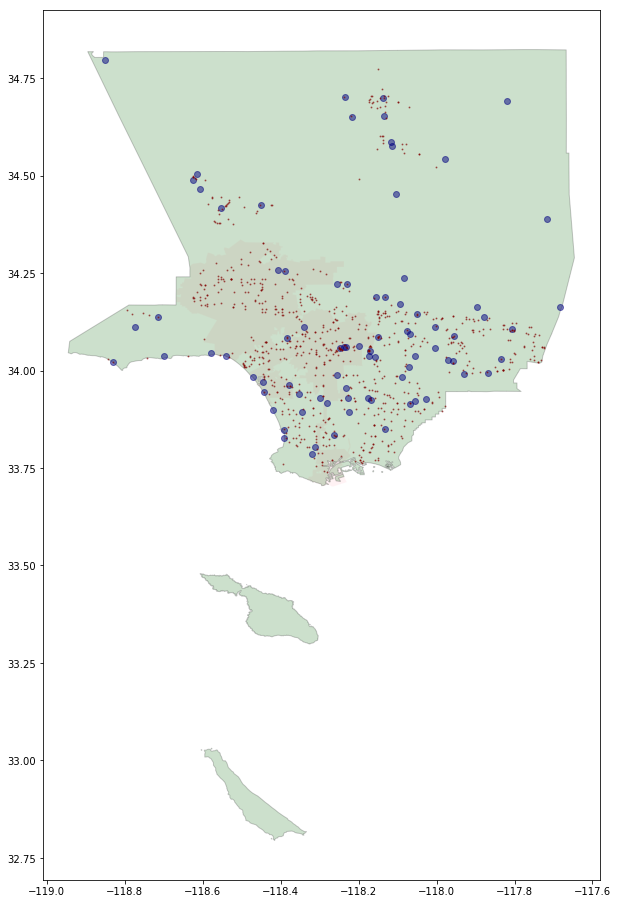

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,16))
city_boundary.plot(ax=ax, color='pink', alpha=0.2, linewidth=1, edgecolor='white')
county_boundary.plot(ax=ax, color='darkgreen', alpha=0.2, linewidth=1, edgecolor='black')
county_stations.plot(ax=ax, color='navy', alpha=0.5, linewidth=1)
alternatives.plot(ax=ax, color='maroon', alpha=0.5, markersize=1)

From here I could continue analyzing the data. Possible questions might be: Does the concentration of alternative fueling stations have a relationship to the income levels of certain portions of LA County? Is there a correlation between the number of county fueling stations and the number of alternative fueling stations in particularly concentrated portions of LA City? Looking to answer these questions is an easier process because we used intake to catalog what could otherwise be complex sources of data. Instead of spending time adding in boilerplate code and searching for the various files we want to load in, we can simiplify our process by incorporating intake into our methodology.